In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime

In [55]:
data_name = "epinions"

data_nw_df = pd.read_csv(f"../rev2data/{data_name}/{data_name}_network.csv", header=None, names=['src', 'dest', 'rating', 'timestamp'], parse_dates=[3], infer_datetime_format=True)
data_gt_df = pd.read_csv(f"../rev2data/{data_name}/{data_name}_gt.csv", header=None, names=['id', 'label'])

if data_name != "epinions":
    data_nw_df["timestamp"] = data_nw_df["timestamp"].astype(int).apply(datetime.fromtimestamp)

In [56]:
print(data_nw_df["timestamp"].min(), data_nw_df["timestamp"].max())

2001-01-10 00:00:00 2002-05-30 00:00:00


Text(0.5, 0, '#Products reviews by users')

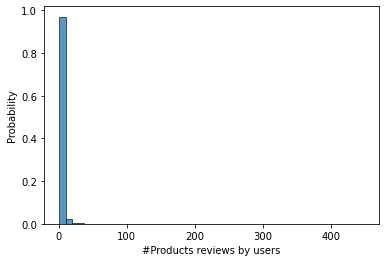

In [47]:
data_src_cnt = data_nw_df.groupby("src").size()
ax = sns.histplot(data_src_cnt, stat="probability", bins=50, kde=False)
ax.set_xlabel("#reviews from user")

<AxesSubplot:ylabel='Probability'>

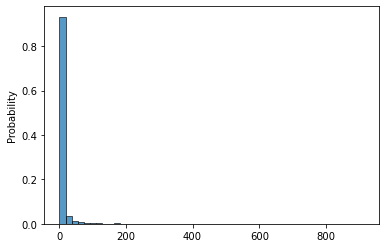

In [4]:
data_dest_cnt = data_nw_df.groupby("dest").size()
ax = sns.histplot(data_dest_cnt, stat="probability", bins=50, kde=False)
ax.set_xlabel("#reviews to product")

(41488, 4)


<AxesSubplot:ylabel='Probability'>

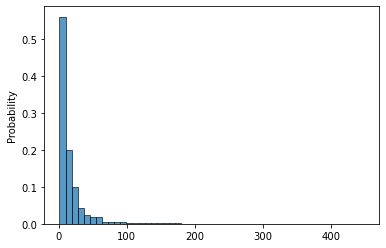

In [5]:
data_nw_gt = data_nw_df[data_nw_df["src"].isin(data_gt_df["id"])]
data_src_cnt = data_nw_gt.groupby("src").size()
ax = sns.histplot(data_src_cnt, stat="probability", bins=50, kde=False)
ax.set_xlabel("#reviews from labelled user")

<AxesSubplot:ylabel='Probability'>

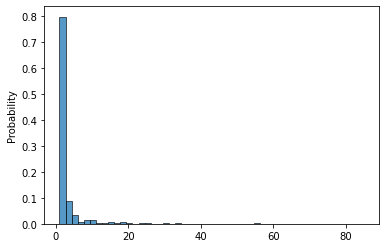

In [6]:
data_dest_cnt = data_nw_gt.groupby("dest").size()
ax = sns.histplot(data_dest_cnt, stat="probability", bins=50, kde=False)
ax.set_xlabel("#reviews to product by labelled user")